In [1]:
import pandas as pd
import numpy as np


In [2]:

data = pd.read_csv('/content/Car_Purchasing_Data.csv')

In [3]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [5]:
data.dtypes

,0
Customer Name,object
Customer e-mail,object
Country,object
Gender,int64
Age,int64
Annual Salary,float64
Credit Card Debt,float64
Net Worth,float64
Car Purchase Amount,float64


In [6]:
data.duplicated().sum()

0

In [7]:
data['Country'].unique()

array(['USA'], dtype=object)

In [8]:
data.isnull().sum()

,0
Customer Name,0
Customer e-mail,0
Country,0
Gender,0
Age,0
Annual Salary,0
Credit Card Debt,0
Net Worth,0
Car Purchase Amount,0


In [9]:
data.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [10]:
data['Customer e-mail']

,Customer e-mail
0,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu
1,eu.dolor@diam.co.uk
2,vulputate.mauris.sagittis@ametconsectetueradip...
3,malesuada@dignissim.com
4,felis.ullamcorper.viverra@egetmollislectus.net
...,...
495,ligula@Cumsociis.ca
496,Cum.sociis.natoque@Sedmolestie.edu
497,penatibus.et@massanonante.com
498,Quisque.varius@arcuVivamussit.net


In [11]:
data['Country']

,Country
0,USA
1,USA
2,USA
3,USA
4,USA
...,...
495,USA
496,USA
497,USA
498,USA


In [12]:
data['Customer Name']

,Customer Name
0,Martina Avila
1,Harlan Barnes
2,Naomi Rodriquez
3,Jade Cunningham
4,Cedric Leach
...,...
495,Walter
496,Vanna
497,Pearl
498,Nell


In [13]:
#data.corr()

In [14]:
columns_to_drop = ['Customer Name', 'Customer e-mail', 'Country']

In [15]:
data.drop(columns=columns_to_drop, inplace=True)

In [16]:
data.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: >

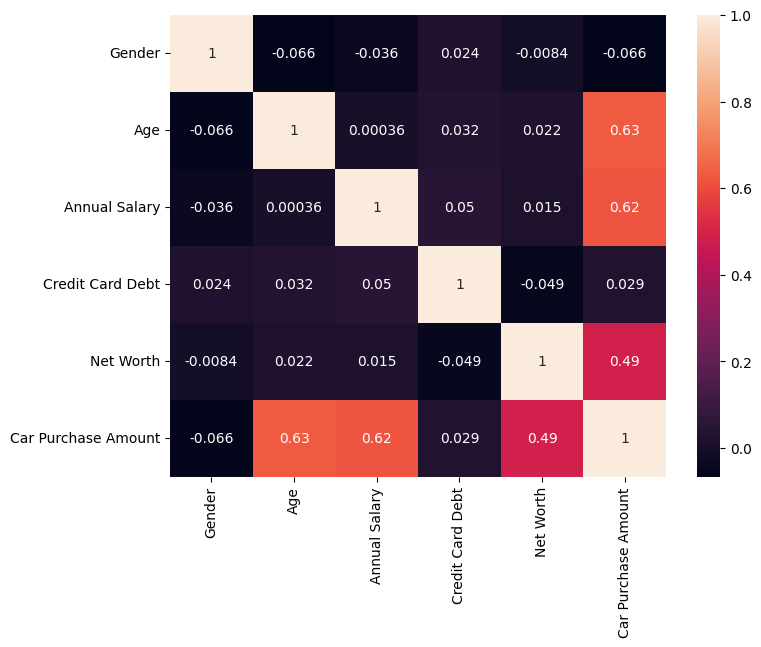

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Net Worth'>

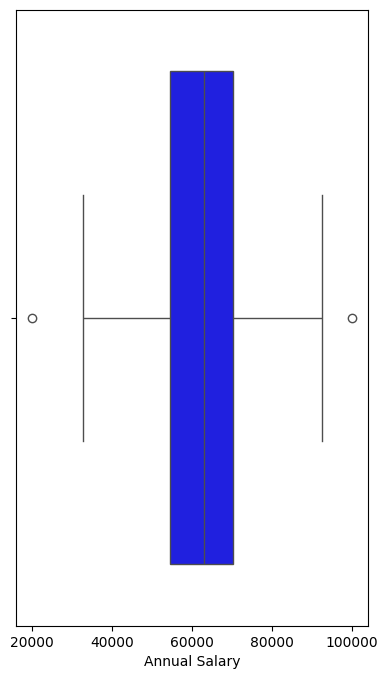

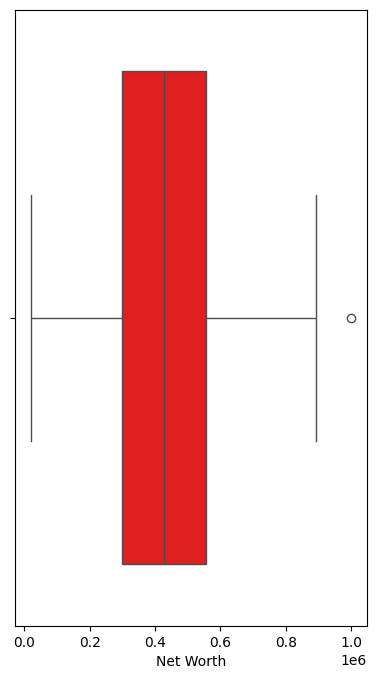

In [19]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.xlabel='Annual Salary'
sns.boxplot(data=data,x='Annual Salary',color='blue')
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.xlabel='Net Worth'
sns.boxplot(data=data,x='Net Worth',color='red')


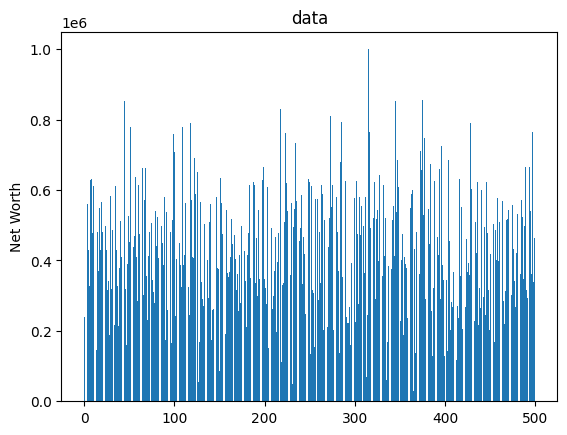

In [20]:
plt.bar(data.index, data['Net Worth'])
plt.title('data')
plt.ylabel('Net Worth')
plt.show()

In [23]:
X= data.drop('Car Purchase Amount' ,axis =1)
y =data['Car Purchase Amount']

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
ridge_model = Ridge(alpha=10.0)
ridge_model.fit(X_train, y_train)

Ridge(alpha=10.0)

In [47]:
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='r2')
print(f'Ridge CV R²: {ridge_cv_scores.mean()}')



Ridge CV R²: 0.9994852673988776


In [48]:
y_pred_ridge = ridge_model.predict(X_test)
print(f'Ridge Test R²: {r2_score(y_test, y_pred_ridge)}')


Ridge Test R²: 0.99942393762097


In [49]:
f_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [50]:
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f'Random Forest CV R²: {rf_cv_scores.mean()}')


Random Forest CV R²: 0.9427800840300996


In [53]:
y_pred_rf = rf_model.predict(X_test)
print(f'Random Forest Test R²: {r2_score(y_test, y_pred_rf)}')

Random Forest Test R²: 0.9526113402846064


In [54]:
importance = rf_model.feature_importances_
for feature, importance in zip(X.columns, importance):
    print(f'Feature: {feature}, Importance: {importance}')


Feature: Gender, Importance: 0.002008961555500521
Feature: Age, Importance: 0.3839621595493749
Feature: Annual Salary, Importance: 0.38911009595368584
Feature: Credit Card Debt, Importance: 0.013171937861854272
Feature: Net Worth, Importance: 0.21174684507958455
